In [2]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch
import warnings
from scipy import stats
from adjustText import adjust_text  # pip install adjustText

import sccoda
import importlib

In [4]:
#import importlib
#import pickle as pkl

In [ ]:
#!pip install sccoda

In [ ]:
#!pip install pertpy 

In [ ]:
#!pip install toytree arviz ete3

In [10]:
!pip install --upgrade tensorflow-probability

In [12]:
#!pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.9 MB/s eta 0:00:001.8 MB/s eta 0:00:01


In [4]:
adata = sc.read('annotated.h5ad')
adata.obs

,samples,condition,location,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,low_label,low_score,_scvi_batch,_scvi_labels,overcluster,low_major,Cell_Type
711_AAACCCAAGTCGGGAT-1,711,Tumor,Right,707,707,6.562444,1396.0,7.242083,26.862464,10.100286,25.716331,0.000000,T follicular helper cells,0.103311,0,0,14,CD4+ T cells,CD4+ T Cells
711_AAACCCACAGAGGAAA-1,711,Tumor,Right,838,838,6.732211,1504.0,7.316548,23.803191,9.441490,13.962767,0.000000,Unknown,0.236022,0,0,11,CD4+ T cells,CD4+ T Cells
711_AAACCCACATGATAGA-1,711,Tumor,Right,435,435,6.077642,613.0,6.419995,17.781403,0.815661,18.270800,0.000000,Unknown,0.400460,0,0,36,CMS3,CMS3
711_AAACCCAGTCTCGCGA-1,711,Tumor,Right,579,579,6.363028,860.0,6.758094,23.255814,15.465117,6.395349,0.000000,Tip-like ECs,0.966648,0,0,28,Tip-like ECs,Tip-like ECs
711_AAACGAAGTTATCTTC-1,711,Tumor,Right,1384,1384,7.233455,2629.0,7.874739,19.246862,8.178015,15.405098,0.000000,gamma delta T cells,0.993837,0,0,15,CD8+ T cells,CD8+ T cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706_TTTGGTTCAAACACCT-1,706,Tumor,Left,1815,1815,7.504392,4944.0,8.506132,21.318770,1.961974,21.318771,0.020227,CD8+ T cells,0.999997,0,0,1,CD8+ T cells,CD8+ T cells
706_TTTGGTTCAACGGGTA-1,706,Tumor,Left,909,909,6.813445,3528.0,8.168770,34.722222,0.368481,25.368483,0.000000,Pro-inflammatory,0.549964,0,0,12,SPP1+,Spp1+
706_TTTGGTTTCTATCGCC-1,706,Tumor,Left,4658,4658,8.446556,23600.0,10.069044,17.559322,3.237288,18.135593,0.004237,Stromal 2,0.961222,0,0,25,Stromal 2,Stromal 2
706_TTTGTTGCATCAGCGC-1,706,Tumor,Left,374,374,5.926926,686.0,6.532334,23.032070,10.932944,33.236153,0.000000,CMS2,0.978673,0,0,10,CMS2,CMS2


In [6]:
adata_tumor =adata.copy()
adata_tumor = adata_tumor[adata_tumor.obs['condition'] == 'Tumor'].copy()
adata_tumor

AnnData object with n_obs × n_vars = 43640 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
from sccoda.model import other_models as om

/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Plea

### condition composional analysis

In [6]:
cov_df = adata.obs[["samples", "condition", "location"]].drop_duplicates().set_index("samples")
print(cov_df)

        condition location
samples                   
711         Tumor    Right
710         Tumor    Right
707         Tumor     Left
B_cac10    Normal     Left
B_cac11    Normal    Right
B_cac14    Normal     Left
B_cac15    Normal     Left
B_cac4     Normal     Left
B_cac6     Normal     Left
B_cac7     Normal    Right
T_cac1      Tumor    Right
T_cac10     Tumor     Left
T_cac11     Tumor    Right
T_cac12     Tumor    Right
T_cac13     Tumor    Right
T_cac14     Tumor     Left
T_cac15     Tumor     Left
T_cac16     Tumor     Left
T_cac2      Tumor     Left
T_cac3      Tumor    Right
T_cac4      Tumor     Left
T_cac5      Tumor    Right
T_cac6      Tumor     Left
T_cac7      Tumor    Right
T_cac8      Tumor    Right
T_cac9      Tumor     Left
709         Tumor    Right
708         Tumor     Left
706         Tumor     Left


In [8]:
data_scanpy_2 = dat.from_scanpy(
    adata,
    cell_type_identifier="Cell_Type",
    sample_identifier="samples",
    covariate_df=  cov_df
)
print(data_scanpy_2)

AnnData object with n_obs × n_vars = 29 × 21
    obs: 'condition', 'location'
    var: 'n_cells'


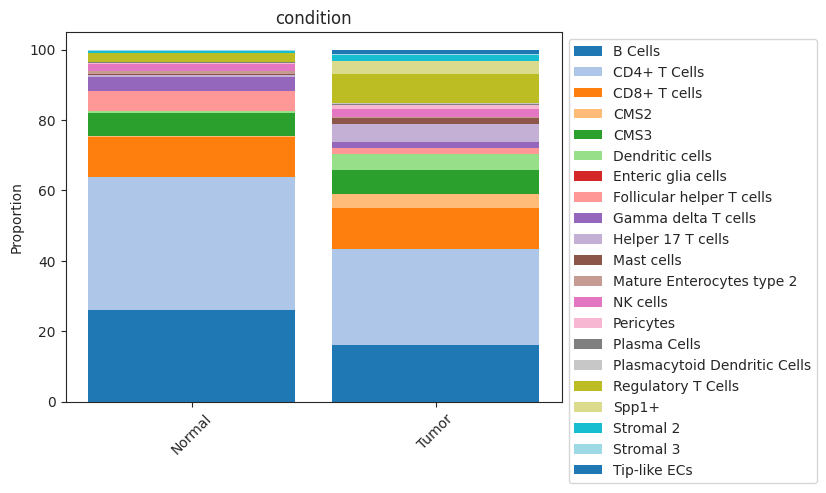

In [11]:
# Stacked barplot for each sample all data
viz.stacked_barplot(data_scanpy_2, feature_name="condition")
plt.show()

/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/sccoda/util/data_visualization.py:335: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


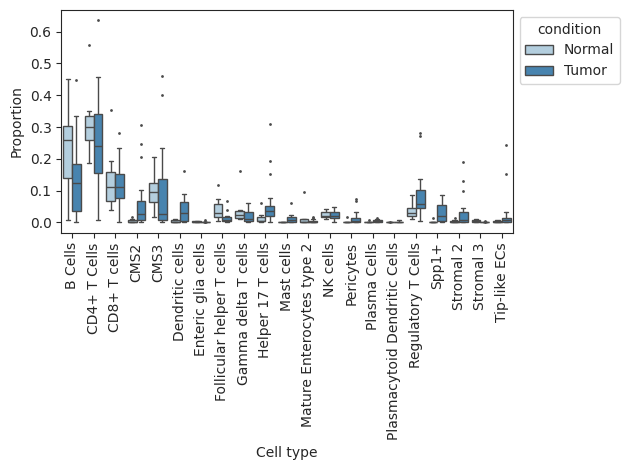

In [12]:
# Grouped boxplots. No facets, relative abundance, no dots.
viz.boxplots(
    data_scanpy_2,
    feature_name="condition",
    plot_facets=False,
    y_scale="relative",
    add_dots=False,
)
plt.show()


In [9]:
cov_df = adata_tumor.obs[["samples", "condition", "location"]].drop_duplicates().set_index("samples")
print(cov_df)

        condition location
samples                   
711         Tumor    Right
710         Tumor    Right
707         Tumor     Left
T_cac1      Tumor    Right
T_cac10     Tumor     Left
T_cac11     Tumor    Right
T_cac12     Tumor    Right
T_cac13     Tumor    Right
T_cac14     Tumor     Left
T_cac15     Tumor     Left
T_cac16     Tumor     Left
T_cac2      Tumor     Left
T_cac3      Tumor    Right
T_cac4      Tumor     Left
T_cac5      Tumor    Right
T_cac6      Tumor     Left
T_cac7      Tumor    Right
T_cac8      Tumor    Right
T_cac9      Tumor     Left
709         Tumor    Right
708         Tumor     Left
706         Tumor     Left


In [10]:
data_scanpy_2 = dat.from_scanpy(
    adata_tumor,
    cell_type_identifier="Cell_Type",
    sample_identifier="samples",
    covariate_df=  cov_df
)
print(data_scanpy_2)

AnnData object with n_obs × n_vars = 22 × 21
    obs: 'condition', 'location'
    var: 'n_cells'


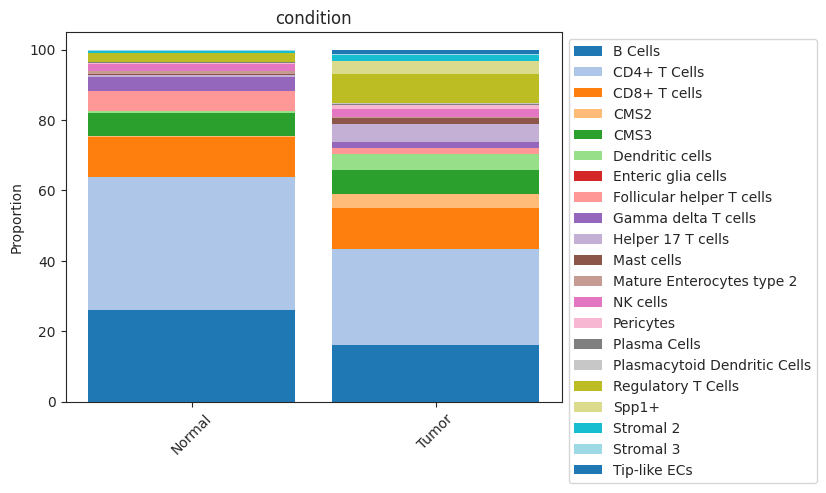

In [10]:
# Stacked barplot for each sample
viz.stacked_barplot(data_scanpy_2, feature_name="location")
plt.show()

/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/sccoda/util/data_visualization.py:335: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


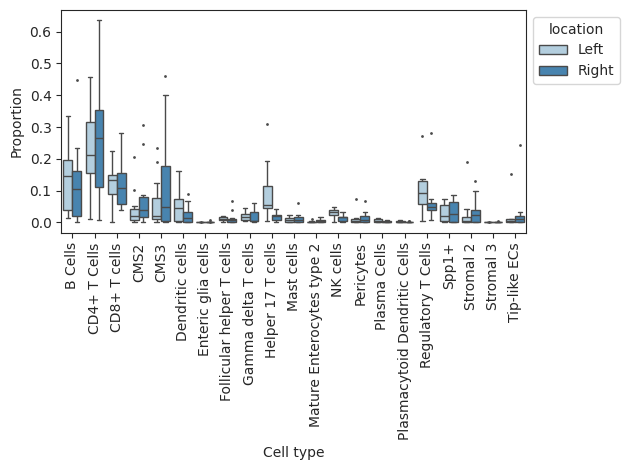

In [36]:
# Grouped boxplots. No facets, relative abundance, no dots.
viz.boxplots(
    data_scanpy_2,
    feature_name="location",
    plot_facets=False,
    y_scale="relative",
    add_dots=False,
)
plt.show()


/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/sccoda/util/data_visualization.py:335: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cell_types, rotation=90)


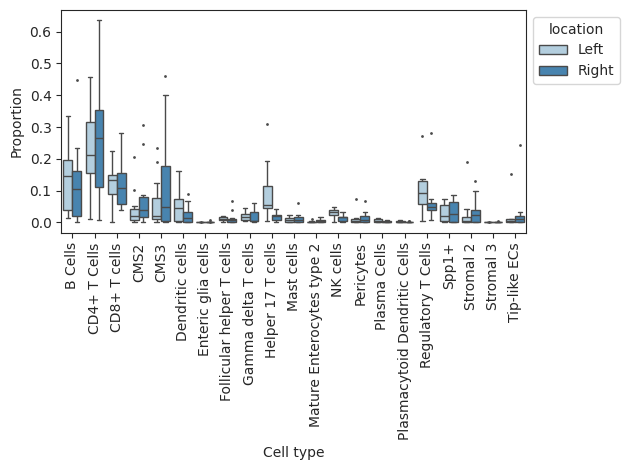

In [41]:
viz.boxplots(data_scanpy_2, feature_name="location")
plt.show()

/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/seaborn/axisgrid.py:85

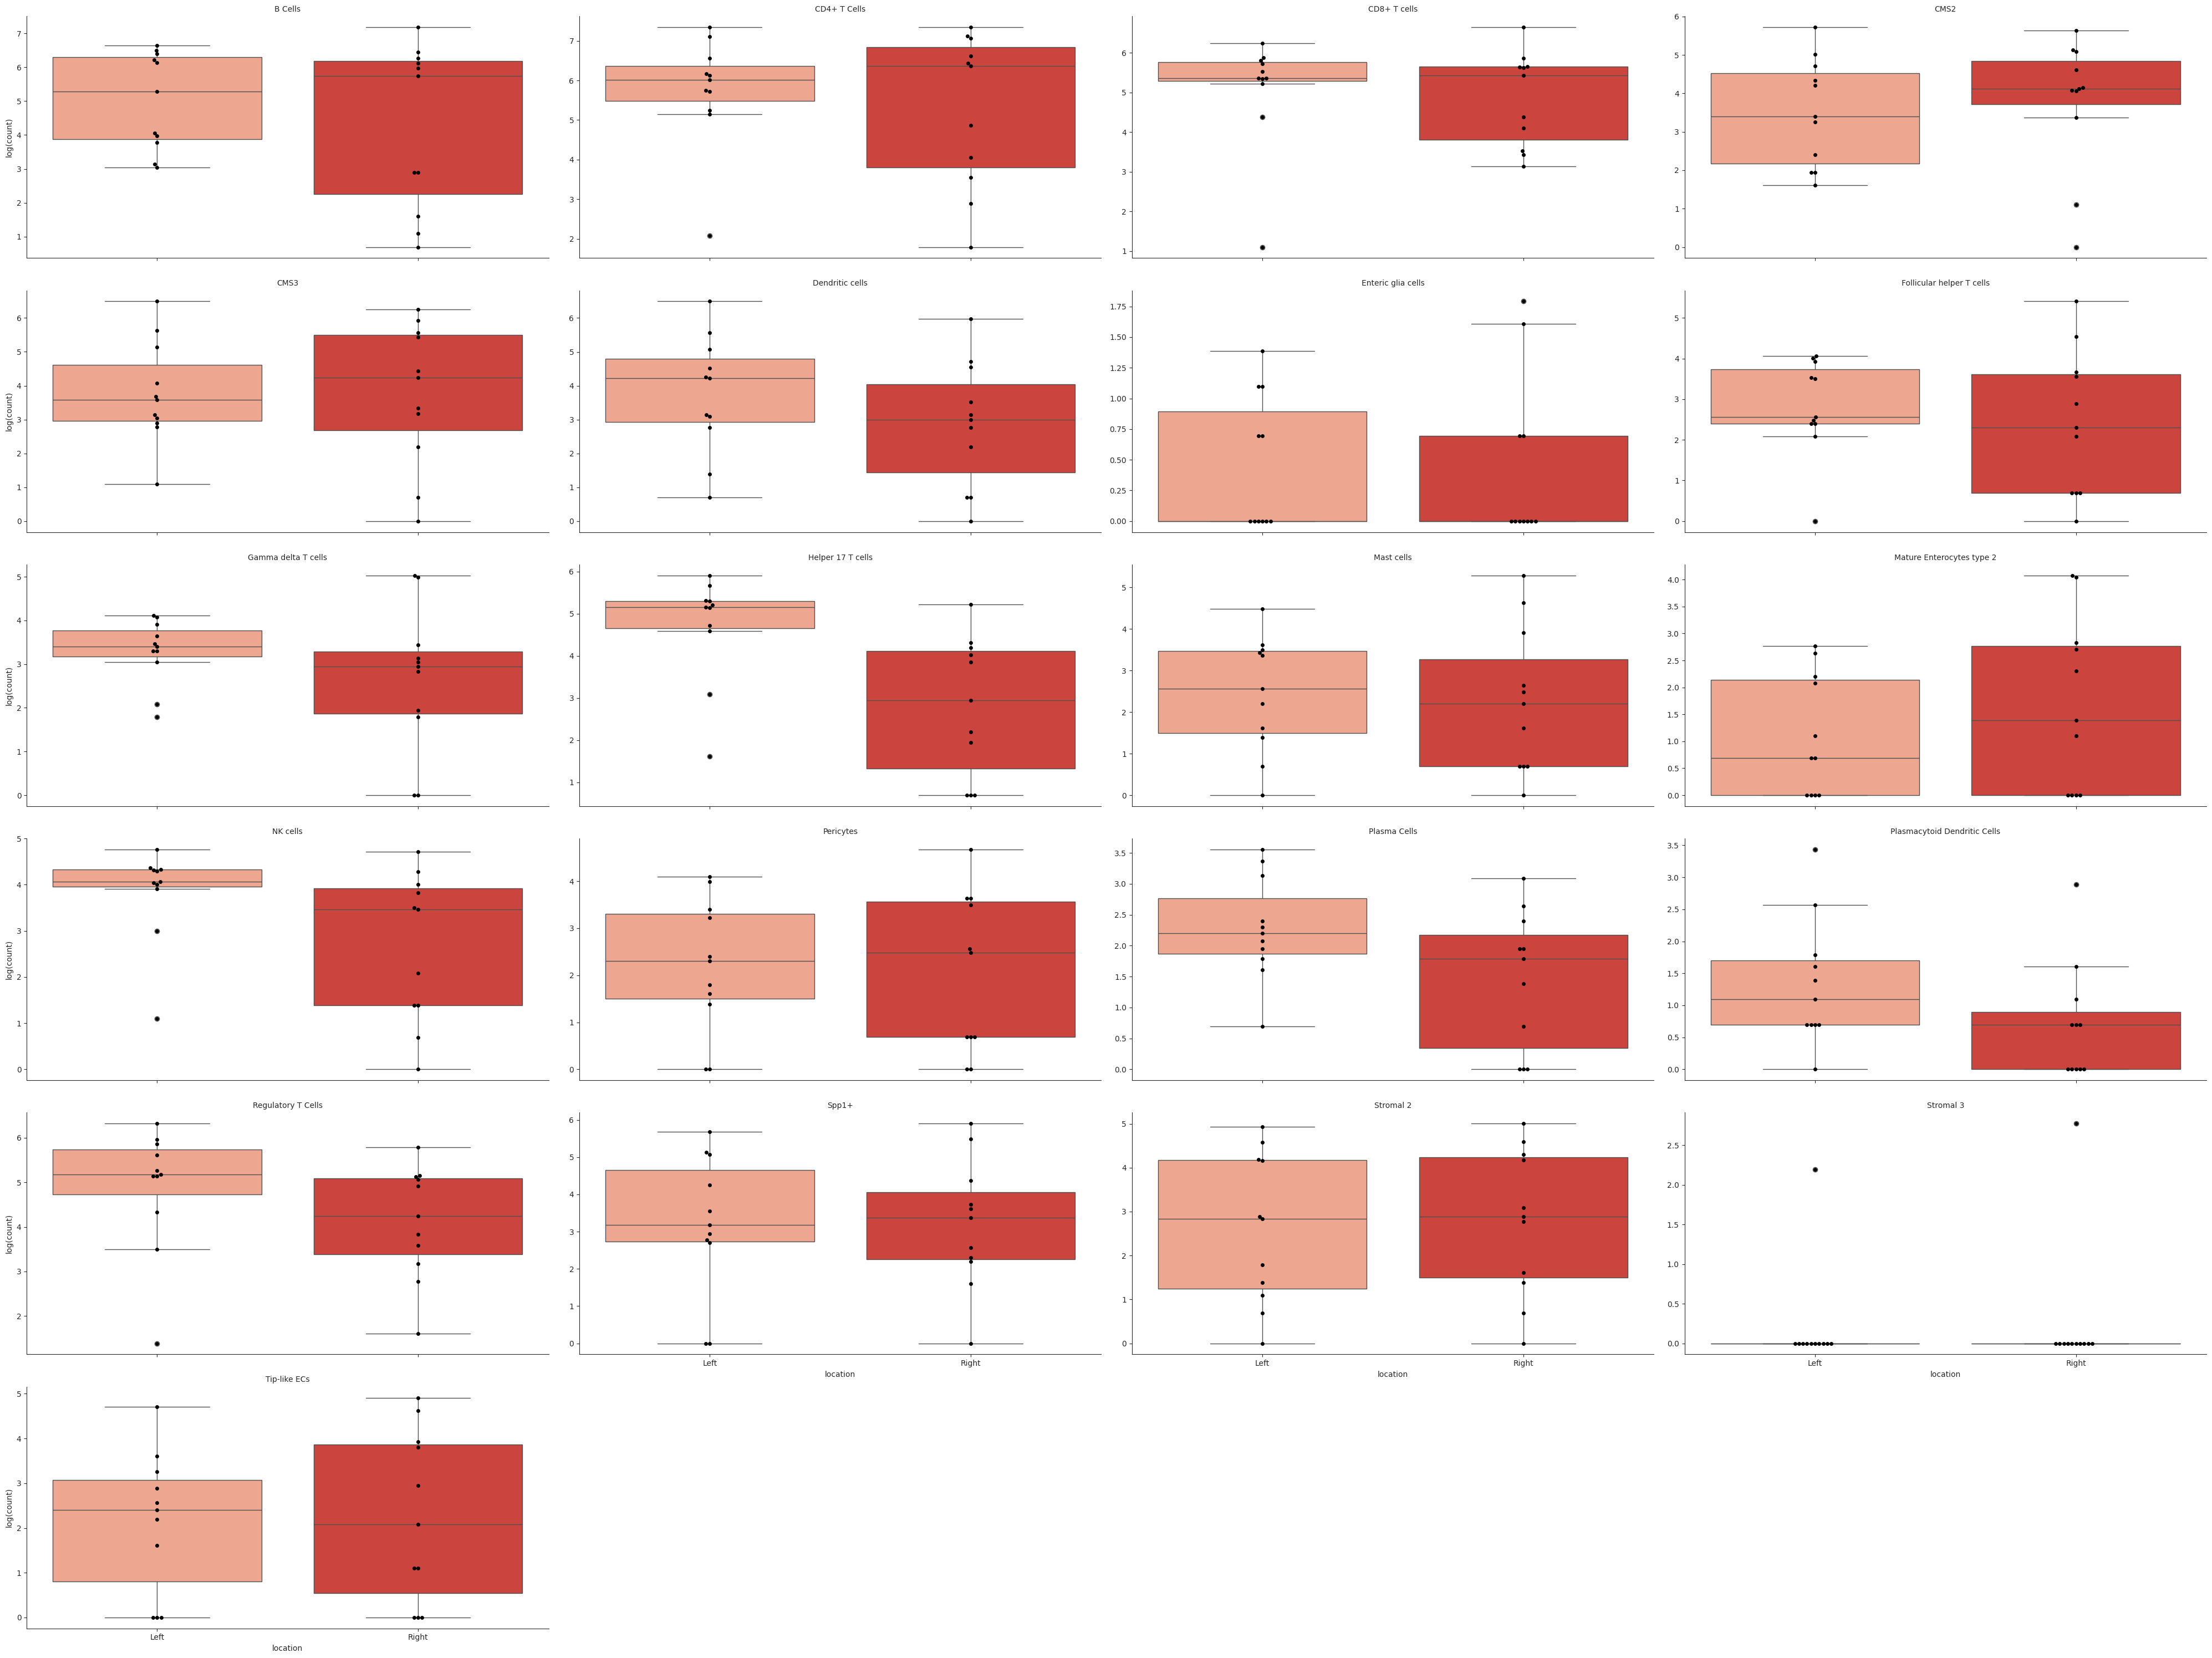

In [37]:
# Grouped boxplots. Facets, log scale, added dots and custom color palette.
viz.boxplots(
    data_scanpy_2,
    feature_name="location",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.show()

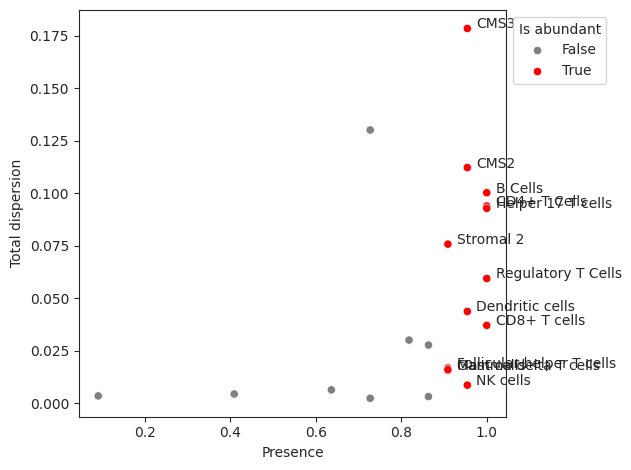

In [38]:
viz.rel_abundance_dispersion_plot(
    data=data_scanpy_2,
    abundant_threshold=0.9
)
plt.show()

In [7]:
data_scanpy_1 = dat.from_scanpy(
    adata_tumor,
    cell_type_identifier="Cell_Type",
    sample_identifier="samples",
    #covariate_df=cov_df
)
print(data_scanpy_1)

No covariate information specified!
AnnData object with n_obs × n_vars = 22 × 21
    var: 'n_cells'


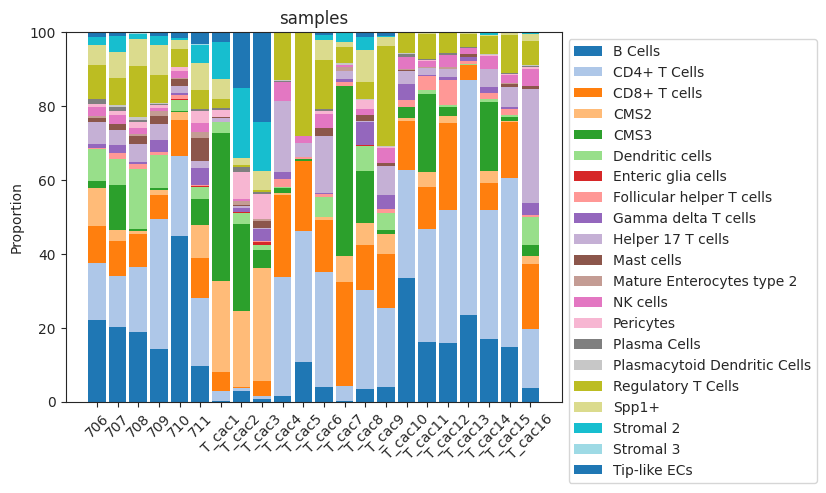

In [18]:
# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_scanpy_1, feature_name="samples")
plt.show()

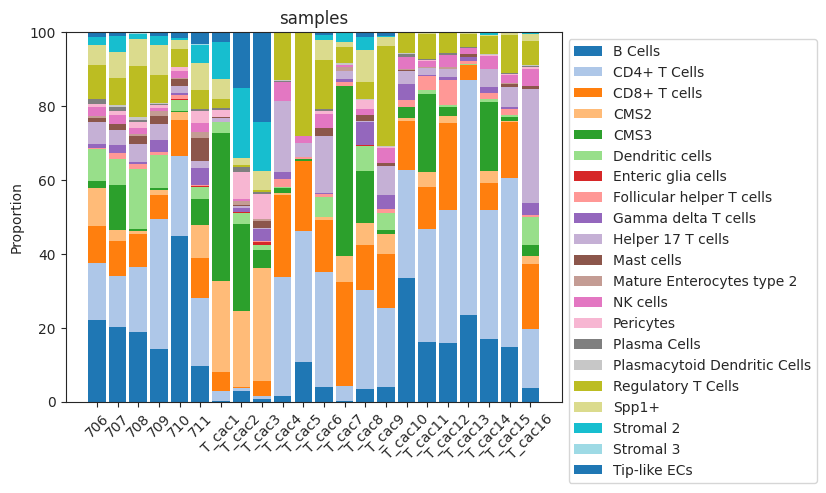

In [42]:
# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_scanpy_2, feature_name="samples")
plt.show()

In [46]:
model_tumor= mod.CompositionalAnalysis(data_scanpy_2, formula="location", reference_cell_type="CD4+ T Cells")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [56]:
adata_tumor

AnnData object with n_obs × n_vars = 43640 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
ancom_model = om.AncomModel(adata, covariate_column="location")


/tmp/ipykernel_26341/285265234.py:1: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  ancom_model = om.AncomModel(adata, covariate_column="location")
/home/sapien/anaconda3/envs/integ/lib/python3.10/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


In [54]:
ancom_model.fit_model()
print(ancom_model.ancom_out)

[]


In [11]:
model_location = data_scanpy_2.prepare(
       formula="location",
       reference_cell_type="automatic"  # or choose a stable reference
   )
   
model_location.run_nuts(num_samples=20000, num_warmup=2000)

AttributeError: 'AnnData' object has no attribute 'prepare'